In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

In [4]:
checkpoints_eoc = pd.read_csv('../Data/checkpoints_eoc.csv')
checkpoints_pulse = pd.read_csv('../Data/checkpoints_pulse.csv')
len(checkpoints_pulse["institution_id"].unique())

10

In [5]:
unique_institutions = checkpoints_pulse["institution_id"].unique()
for inst in unique_institutions:
    print("Number of items with institution_id ", inst, ": ", len(checkpoints_pulse[checkpoints_pulse["institution_id"] == inst]))

Number of items with institution_id  04157183-8665-400a-925d-3bbb70ffe45e :  96
Number of items with institution_id  292cff87-3c74-4e94-8622-233afb0427dd :  5760
Number of items with institution_id  2f830a93-5a14-4aff-a6e8-c7d2562e2007 :  624
Number of items with institution_id  364da48a-e0b2-4507-bc31-e7761fe16e95 :  576
Number of items with institution_id  94a809a9-a0ef-4c47-8d96-3a5ad76f674b :  2880
Number of items with institution_id  97aebe75-a051-4bff-a2c0-1d53eb5d9498 :  912
Number of items with institution_id  c699dd97-e5a4-49ce-9718-877a81b1d475 :  96
Number of items with institution_id  d2e6c885-36f4-48b9-988b-42eef1f8ed9d :  288
Number of items with institution_id  f17495c5-e105-492d-878a-07a03ea3f805 :  288
Number of items with institution_id  fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030 :  192


In [16]:
len(checkpoints_pulse[checkpoints_pulse["institution_id"] == '94a809a9-a0ef-4c47-8d96-3a5ad76f674b'])

2880

In [17]:
len(checkpoints_pulse[checkpoints_pulse["institution_id"] == '364da48a-e0b2-4507-bc31-e7761fe16e95'])


576

In [7]:
checkpoints_eoc.head()

,student_id,class_id,chapter_number,book,EOC,n_possible,n_correct,n_attempt
0,001824fb-a2fd-431d-aef6-7a1250d97a62,074123e7-cd90-4500-86fe-286aaa733bf5,1,College / Statistics and Data Science (ABC),0.921053,38,35,40
1,001824fb-a2fd-431d-aef6-7a1250d97a62,074123e7-cd90-4500-86fe-286aaa733bf5,2,College / Statistics and Data Science (ABC),0.839080,87,73,127
2,001824fb-a2fd-431d-aef6-7a1250d97a62,074123e7-cd90-4500-86fe-286aaa733bf5,3,College / Statistics and Data Science (ABC),0.769231,104,80,145
3,001824fb-a2fd-431d-aef6-7a1250d97a62,074123e7-cd90-4500-86fe-286aaa733bf5,4,College / Statistics and Data Science (ABC),0.743590,118,87,217
4,001824fb-a2fd-431d-aef6-7a1250d97a62,074123e7-cd90-4500-86fe-286aaa733bf5,5,College / Statistics and Data Science (ABC),0.777778,63,49,90


In [8]:
checkpoints_pulse.head()

,book,release,institution_id,class_id,student_id,chapter_number,construct,response
0,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,10,Cost,NaN
1,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,11,Cost,NaN
2,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,12,Cost,NaN
3,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,2,Cost,2.0
4,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,3,Cost,2.0


In [10]:
checkpoints_pulse['student_id'].nunique()

238

In [11]:
drop_na_vals = checkpoints_pulse.dropna(subset=['response'])
drop_na_vals.head()

,book,release,institution_id,class_id,student_id,chapter_number,construct,response
3,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,2,Cost,2.0
4,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,3,Cost,2.0
6,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,5,Cost,2.0
7,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,6,Cost,2.0
9,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,953768c5-32fa-4190-8fee-1da82d8710bc,8,Cost,2.0


In [12]:
# Count NaN values in the 'response' column for each 'chapter_number'
nan_counts = checkpoints_pulse.groupby('chapter_number')['response'].apply(lambda x: x.isnull().sum())

# Display the counts
print(nan_counts)

chapter_number
2     289
3     306
4     350
5     352
6     347
7     333
8     324
9     336
10    414
11    467
12    476
13    788
Name: response, dtype: int64


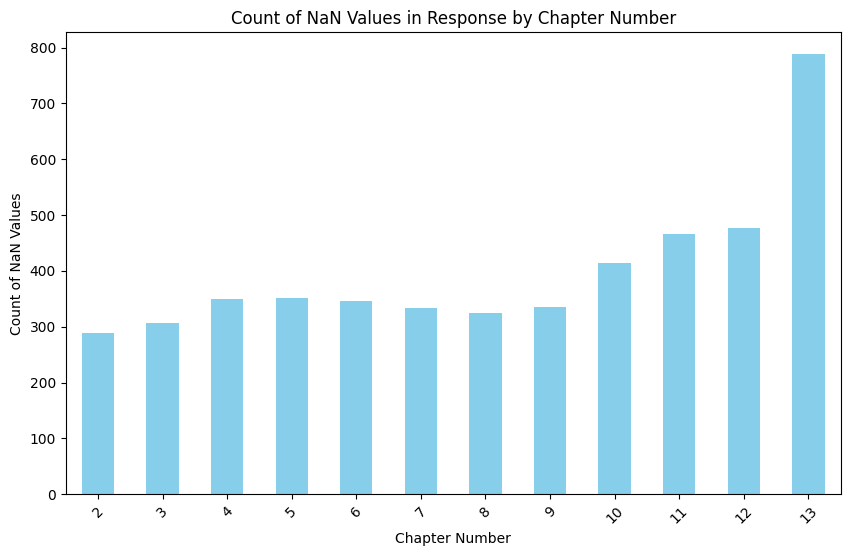

In [21]:
# Plot
nan_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Count of NaN Values in Response by Chapter Number')
plt.xlabel('Chapter Number')
plt.ylabel('Count of NaN Values')
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.show()

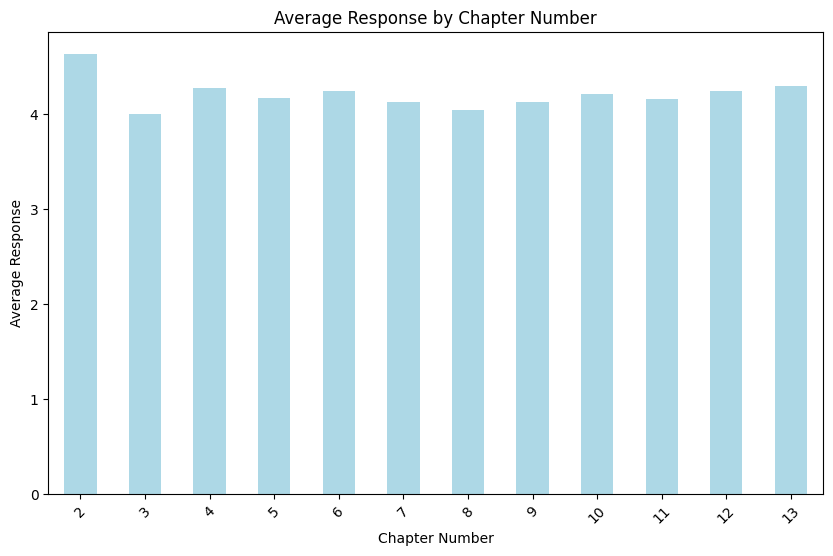

In [53]:
expectancy_df = drop_na_vals[drop_na_vals['construct'] == 'Expectancy']

average_response_per_chapter = expectancy_df.groupby('chapter_number')['response'].mean()

# Plotting
average_response_per_chapter.plot(kind='bar', color='lightblue', figsize=(10, 6))

plt.title('Average Response by Chapter Number')
plt.xlabel('Chapter Number')
plt.ylabel('Average Response')
plt.xticks(rotation=45)  # Rotate chapter numbers for better readability
plt.show()

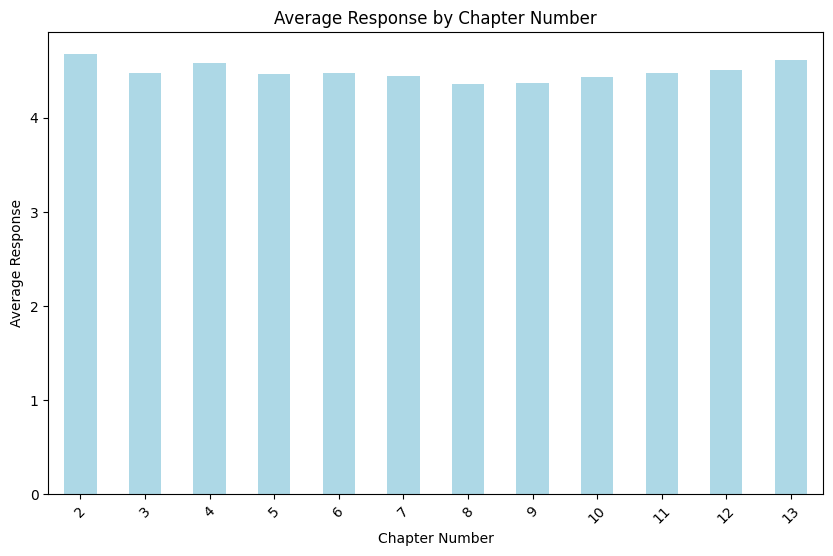

In [54]:
Utility_Value_df = drop_na_vals[drop_na_vals['construct'] == 'Utility Value']

average_response_per_chapter1 = Utility_Value_df.groupby('chapter_number')['response'].mean()

# Plotting
average_response_per_chapter1.plot(kind='bar', color='lightblue', figsize=(10, 6))

plt.title('Average Response by Chapter Number')
plt.xlabel('Chapter Number')
plt.ylabel('Average Response')
plt.xticks(rotation=45)  # Rotate chapter numbers for better readability
plt.show()

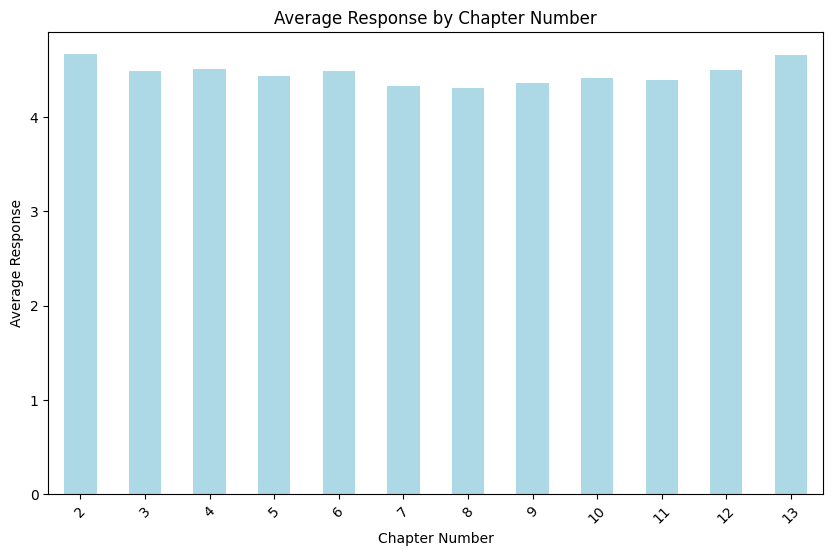

In [55]:
Intrinsic_Value_df = drop_na_vals[drop_na_vals['construct'] == 'Intrinsic Value']

average_response_per_chapter2 = Intrinsic_Value_df.groupby('chapter_number')['response'].mean()

# Plotting
average_response_per_chapter2.plot(kind='bar', color='lightblue', figsize=(10, 6))

plt.title('Average Response by Chapter Number')
plt.xlabel('Chapter Number')
plt.ylabel('Average Response')
plt.xticks(rotation=45)  # Rotate chapter numbers for better readability
plt.show()

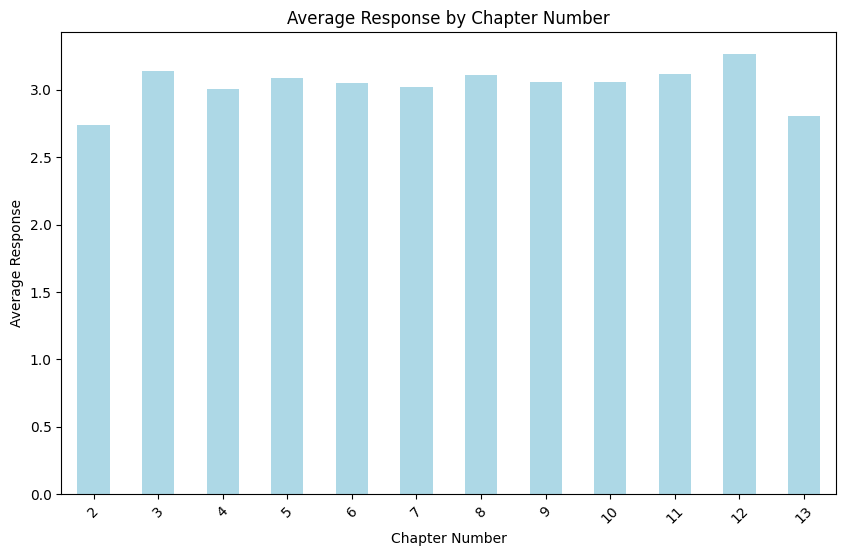

In [56]:
Cost_df = drop_na_vals[drop_na_vals['construct'] == 'Cost']

average_response_per_chapter3 = Cost_df.groupby('chapter_number')['response'].mean()

# Plotting
average_response_per_chapter3.plot(kind='bar', color='lightblue', figsize=(10, 6))

plt.title('Average Response by Chapter Number')
plt.xlabel('Chapter Number')
plt.ylabel('Average Response')
plt.xticks(rotation=45)  # Rotate chapter numbers for better readability
plt.show()

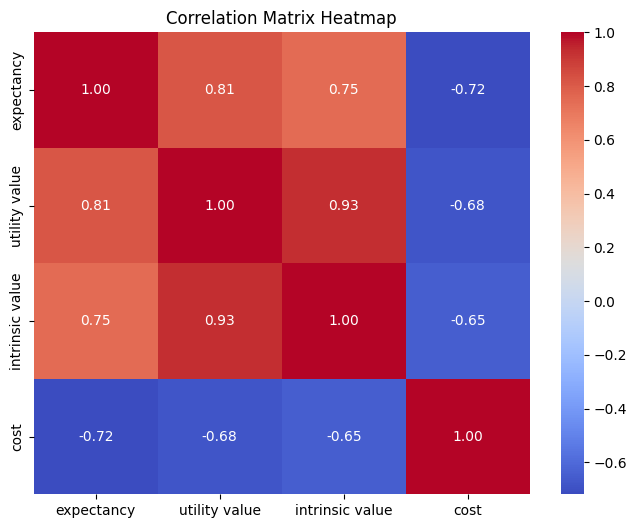

In [57]:
df = pd.concat([average_response_per_chapter, average_response_per_chapter1, average_response_per_chapter2, average_response_per_chapter3], axis=1)
# Optionally, you can give names to the columns
df.columns = ['expectancy', 'utility value', 'intrinsic value', 'cost']

correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix Heatmap')
plt.show()